# Project
## Team_1 NDSA_B4
### Fifa 19 Value prediction

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#pip install plotly

In [ ]:
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
fifa_df = pd.read_csv('/content/drive/MyDrive/ICT Final Project/fifa.csv')

In [ ]:
fifa_df.head().T

,0,1,2,3,4
ID,158023,20801,190871,193080,192985
Name,L. Messi,Cristiano Ronaldo,Neymar Jr,De Gea,K. De Bruyne
Age,31,33,26,27,27
Nationality,Argentina,Portugal,Brazil,Spain,Belgium
Overall,94,94,92,91,91
Potential,94,94,93,93,92
Club,FC Barcelona,Juventus,Paris Saint-Germain,Manchester United,Manchester City
Value,110500000.0,77000000.0,118500000.0,72000000.0,102000000.0
Wage,565000.0,405000.0,290000.0,260000.0,355000.0
Special,2202,2228,2143,1471,2281


# Data Understanding

In [ ]:
fifa_df.shape

(18207, 59)

There are 18207 rows and 59 columns in the data.

In [ ]:
fifa_df['ID'].nunique()

18207

All the ID's are unique.

In [ ]:
fifa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 59 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     17955 non-null  float64
 8   Wage                      17966 non-null  float64
 9   Special                   18207 non-null  int64  
 10  Preferred Foot            18159 non-null  object 
 11  International Reputation  18159 non-null  float64
 12  Weak Foot                 18159 non-null  float64
 13  Skill Moves               18159 non-null  float64
 14  Work R

 There are 13 object type columns and 46 numerical(float64,int64) columns in the dataset.

In [ ]:
fifa_df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
ID,18207.0,214298.0,29965.0,16.0,200316.0,221759.0,236530.0,246620.0
Age,18207.0,25.0,5.0,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.0,7.0,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.0,6.0,48.0,67.0,71.0,75.0,95.0
Value,17955.0,2444530.0,5626715.0,10000.0,325000.0,700000.0,2100000.0,118500000.0
Wage,17966.0,9862.0,22117.0,1000.0,1000.0,3000.0,9000.0,565000.0
Special,18207.0,1598.0,273.0,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.0,0.0,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,3.0,1.0,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.0,1.0,1.0,2.0,2.0,3.0,5.0




*   The age range between 16 and 45 with a median of 25.
*   The overall score has a minimum value 46 and maximum value 94.
*   Few columns like Internation Reputation, weak foot and skill moves seems to be discrete type with minimum value 1 and maximum 5.
*   The columns from Crossing to GKReflexes in the order given are scores ranging from 1 to 99





#### Null value checking

In [ ]:
(fifa_df.isnull().sum()[fifa_df.isnull().sum()>0].sort_values(ascending=False)/fifa_df.shape[0])*100

Loaned From                 93.057615
Joined                       8.529686
Contract Valid Until         1.587302
Value                        1.384083
Club                         1.323667
Wage                         1.323667
Position                     0.329544
Jersey Number                0.329544
GKHandling                   0.263635
Positioning                  0.263635
Balance                      0.263635
ShotPower                    0.263635
Jumping                      0.263635
Stamina                      0.263635
Strength                     0.263635
LongShots                    0.263635
Aggression                   0.263635
Interceptions                0.263635
Vision                       0.263635
GKDiving                     0.263635
Penalties                    0.263635
Composure                    0.263635
Agility                      0.263635
GKPositioning                0.263635
GKKicking                    0.263635
Marking                      0.263635
StandingTack



*   51 out of 59 columns have null values in them.
*   Highest percentage in found in 'Loaned From' column.
*   And many columns have the same amount of data missing which might be from the same rows. 
*   We will handle this in the preprocessing step.





# EDA

### Top 10 nations by no. of players

In [ ]:
order_nat = fifa_df['Nationality'].value_counts()[:10]
nat = pd.DataFrame({'Nationality':order_nat.index,'Count':order_nat.to_list()})
px.defaults.width = 700
px.defaults.height = 500
fig=px.bar(nat,y='Nationality',x='Count',text_auto=True).update_yaxes(categoryorder='total ascending')
fig.update_layout(title='Top 10 Nations by number of players')



*   England, Germany, Spain, Argentina etc. are the countries with high number of players




### Top 10 clubs by mean overall score

In [ ]:
club_o = fifa_df.groupby('Club')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(10)
px.defaults.width = 700
px.defaults.height = 500
fig = px.bar(club_o, x="Overall", y="Club", orientation='h', text_auto=True)
fig.update_layout(title='Top 10 Clubs based on Overall Score')
fig.show()


*   Juventus, Napoli, Inter, Real Madrid etc. are the clubs with high average overall scores.
   



### Top 10 Clubs based on average value.

In [ ]:
club_v = fifa_df.groupby('Club')['Value'].mean().reset_index().sort_values('Value', ascending=True).tail(10)
fig = px.bar(club_v, x="Value", y="Club", orientation='h', color_discrete_sequence =['lightgreen']*len(club_v), text_auto=True,)
fig.update_layout(title='Top 10 Clubs based on  average Value')

fig.show()



*   Juventus, Real Madrid and FC Barcelona are the clubs with high average value.




### Top 10 players by Overall score

In [ ]:
name_c = fifa_df.groupby('Name')['Overall'].mean().reset_index().sort_values('Overall', ascending=True).tail(10)
px.defaults.width = 700
px.defaults.height = 500
fig = px.bar(name_c, x="Overall", y="Name", orientation='h', text_auto=True)
fig.update_layout(title='Top 10 Players based on Overall Score')
fig.show()



*  L.Messi, Cristiano Ronaldo, Neymar Jr, De Gea etc. are players with high overall scores.




### Top young players with high potential

Here we considered players under the age 25. 

In [ ]:
c1=fifa_df['Age']<25
c3=fifa_df['Potential']>85
young=fifa_df[c1&c3] 
young[['Name','Age','Potential']].sort_values('Potential',ascending=False)[:10]

,Name,Age,Potential
25,K. Mbappé,19,95
15,P. Dybala,24,94
229,G. Donnarumma,19,93
42,S. Umtiti,24,92
55,L. Sané,22,92
77,M. Škriniar,23,92
79,Marco Asensio,22,92
156,Gabriel Jesus,21,92
155,O. Dembélé,21,92
1143,Vinícius Júnior,17,92


This shows that young players like K.Mbappe, P.Dybala, G.Donnarumma etc. will show case a good performance in coming years.

# Univariate Analysis

### Distribution of Age of players

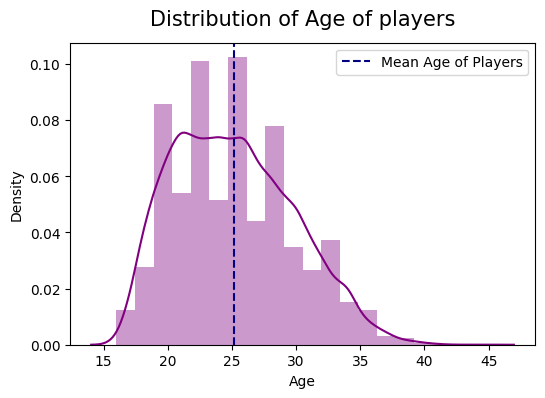

In [ ]:
plt.figure(dpi = 100)
sns.distplot(fifa_df['Age'], bins = 20, color = 'purple')

plt.axvline(x = np.mean(fifa_df['Age']), linestyle = 'dashed', c = 'navy', label = 'Mean Age of Players')
plt.legend()
plt.title('Distribution of Age of players',size=15,y=1.03);



*   Most players are in the age range 20 to 30.
*   The distribution seems to be slightly right skewed.



### Distribution of Overall score

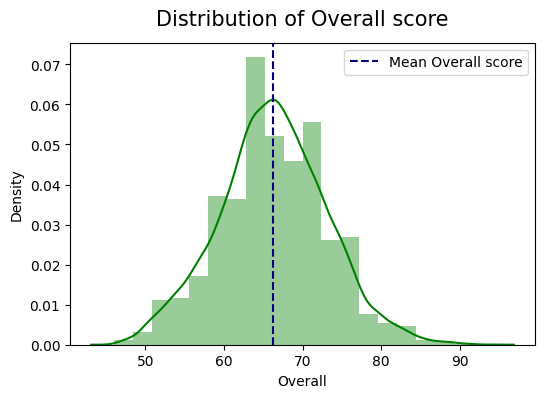

In [ ]:
plt.figure(dpi = 100)
sns.distplot(fifa_df['Overall'], bins = 20, color = 'green')

plt.axvline(x = np.mean(fifa_df['Overall']), linestyle = 'dashed', c = 'navy', label = 'Mean Overall score')
plt.legend()
plt.title('Distribution of Overall score',size=15,y=1.03);



*   The overall score has almost normal distribution.




In [ ]:
px.defaults.width = 500
px.defaults.height = 400
fig=px.box(fifa_df,x='Overall')
fig.update_layout(title='Overall distribution ')

Overall ranges from 46 to 94 with a median of 66 with few outliers.

### Value Distribution

No handles with labels found to put in legend.


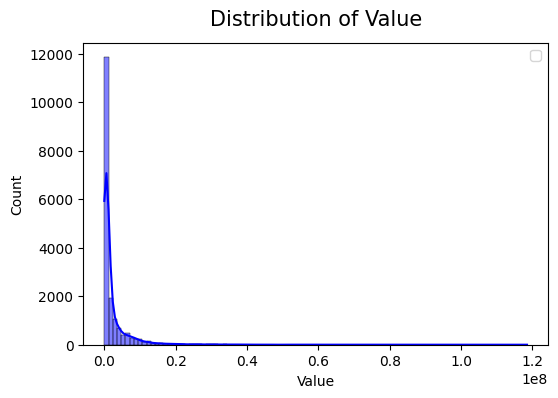

In [ ]:
plt.figure(dpi = 100)
sns.histplot(fifa_df['Value'], bins = 100,kde=True,color='blue')
plt.legend()
plt.title('Distribution of Value',size=15,y=1.03);

In [ ]:
px.defaults.width = 500
px.defaults.height = 400
fig=px.box(fifa_df,x='Value')
fig.update_layout(title='Value distribution ')

Value of players has a minimum 10K and maximum 118.25M , with a median 700K .The plot shows a lot of outliers.  (Hovering over the plot gives details)

### Best players in different aspects

In [ ]:
att_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('Best players in different aspects')
print('_________________________________')
for i in att_cols:
    
    print('Best',i,' : ',fifa_df.loc[fifa_df[i].idxmax()][1])
    print('----------------------------')

Best players in different aspects
_________________________________
Best Crossing  :  K. De Bruyne
----------------------------
Best Finishing  :  L. Messi
----------------------------
Best HeadingAccuracy  :  Naldo
----------------------------
Best ShortPassing  :  L. Modrić
----------------------------
Best Volleys  :  E. Cavani
----------------------------
Best Dribbling  :  L. Messi
----------------------------
Best Curve  :  Quaresma
----------------------------
Best FKAccuracy  :  L. Messi
----------------------------
Best LongPassing  :  T. Kroos
----------------------------
Best BallControl  :  L. Messi
----------------------------
Best Acceleration  :  Douglas Costa
----------------------------
Best SprintSpeed  :  K. Mbappé
----------------------------
Best Agility  :  Neymar Jr
----------------------------
Best Reactions  :  Cristiano Ronaldo
----------------------------
Best Balance  :  Bernard
----------------------------
Best ShotPower  :  Cristiano Ronaldo
--------------

### Number of players by position.

In [ ]:
px.defaults.width = 700
px.defaults.height = 500
order=fifa_df['Position'].value_counts().index[:]
fig=px.histogram(fifa_df,x='Position',text_auto=True).update_xaxes(categoryorder='total descending')
fig.update_layout(title='Number of players by position.')



*   Striker, goalkeeper and central-back are the positions with large number of players.





### Categorising positions

*   Now we will group these positions into 4 main categories such as Forward, Midfielder and Defender and GoalKeeper for better understanding

In [ ]:
   
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
      df.loc[df.Position == i , 'Position'] = 'Forward' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
      df.loc[df.Position == i , 'Position'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
      df.loc[df.Position == i , 'Position'] = 'Defender'
    for i in ['GK']:
      df.loc[df.Position == i , 'Position'] = 'GoalKeeper'  

fifa_df2 = fifa_df.copy()
transform_positions(fifa_df2)

In [ ]:
px.defaults.width = 500
px.defaults.height = 400
fig=px.histogram(fifa_df2,x='Position',text_auto=True).update_xaxes(categoryorder='total descending')
fig.update_layout(title='Number of players by position categories')



*  The number of midfielders are higher than rest of the positions.
*  And the the number of goalkeepers are the lowest.






### International Reputation, Weak Foot and Skill Moves

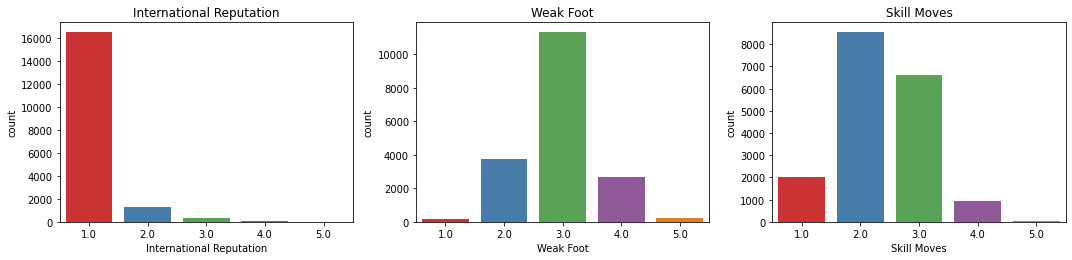

In [ ]:
cols=['International Reputation','Weak Foot','Skill Moves']

plt.figure(figsize=(15,10))
for i, variable in enumerate(cols):
             plt.subplot(3,3,i+1)
             sns.set_palette('Set1')
             ax=sns.countplot(x=fifa_df[variable], data=fifa_df )   
            
             plt.tight_layout()  
             plt.title(variable)




*  These are ordinal attributes ranging from 1 to 5 (least to high)
*  Most players have the ratings:
> *  International reputation of 1
> *  Weak Foot of 3
> *  Skill Moves  of 2 









### Preferred foot and Real face

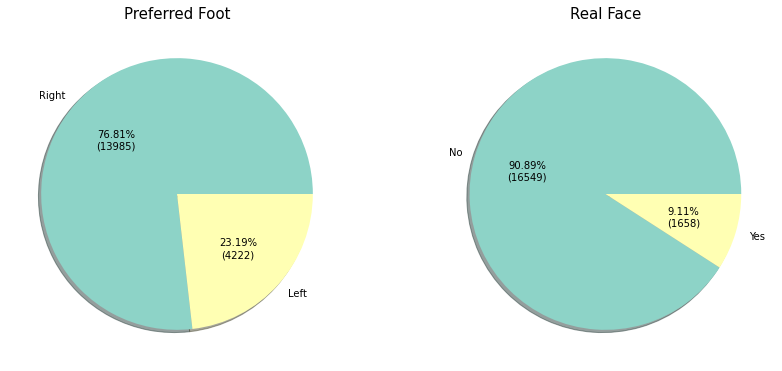

In [ ]:
cols=['Preferred Foot','Real Face']
def my_fmt(x):
    return '{:.2f}%\n({:.0f})'.format(x, total*x/100)
plt.figure(figsize=(18,15))
sns.set_palette('Set3')
for i, variable in enumerate(cols):
             plt.subplot(3,3,i+1)
                
             values = fifa_df[variable]
             v_counts = values.value_counts()
             total = len(values)
             sns.set_palette('Set3')
             ax=plt.pie(v_counts, labels=v_counts.index, autopct=my_fmt, shadow=True);
             plt.tight_layout()  
             plt.title(variable,size=15,y=1.03)



*   76.81 % of the players preffer right foot.
*   Only 9.11 % of the player's real faces are used in the video game



### Work rate and Body type

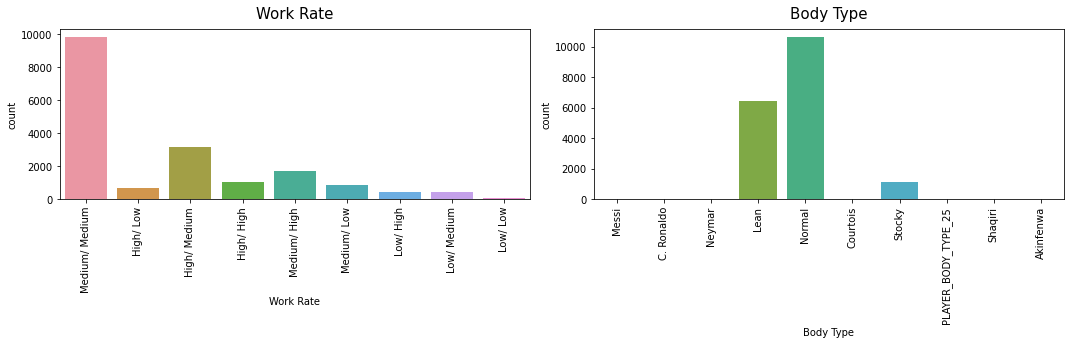

In [ ]:
cols=['Work Rate','Body Type']

plt.figure(figsize=(15,15))
for i, variable in enumerate(cols):
             plt.subplot(4,2,i+1)
             order = fifa_df[variable].value_counts(ascending=False).index   

             sns.set_palette('Reds')
             ax=sns.countplot(x=fifa_df[variable], data=fifa_df )
             plt.title(variable,size=15,y=1.03)
             plt.tight_layout()   
             plt.xticks(rotation=90)   




*   The body type mostly found are in the order , Normal, Lean and Stocky
*   There are some other body types which represents some famous players. We will deal with this in the preprocessing step.



# Bivariate Analysis

### Correlation of Features

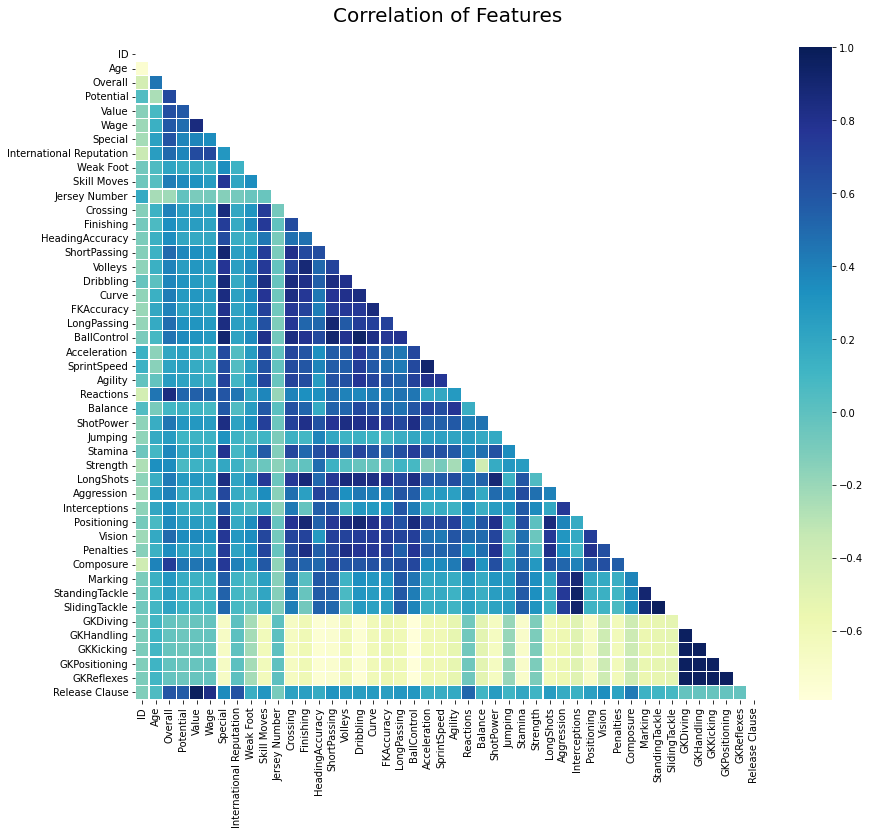

In [ ]:

plt.figure(figsize=(14,12))
matrix = np.triu(fifa_df.corr())
plt.title('Correlation of Features',size=20,y=1.03)
sns.heatmap(fifa_df.corr(),linewidths=0.1,vmax=1.0, 
            square=False, linecolor='white', annot=False,cmap="YlGnBu",mask=matrix);



*   We can see a pattern here for the columns GKDiving, GKHandling, GKKicking and GKReflexes.
*   These four columns are highly positively correlated to themselves, while they are highly negatively correlated to most of the other columns.



### Highly positively correlated to value

In [ ]:
fifa_df.corr()['Release Clause'].sort_values(ascending=False)[:10]

Release Clause              1.000000
Value                       0.973310
Wage                        0.829250
International Reputation    0.620863
Overall                     0.597821
Potential                   0.562346
Reactions                   0.515581
Composure                   0.426652
Special                     0.357165
Vision                      0.337069
Name: Release Clause, dtype: float64



*   Release Clause, Wage and International Reputation are highly positively correlated to Value
*   We will plot scatterplot between them








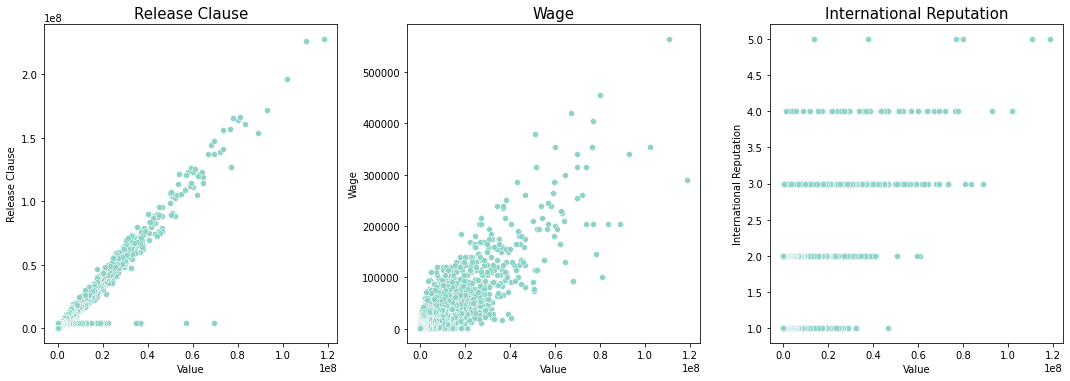

In [ ]:
col = ['Release Clause','Wage','International Reputation']
plt.figure(figsize=(20, 30))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 4, i + 1)
    sns.scatterplot(y=fifa_df[variable],x=fifa_df['Value'])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()



*   We can see that Release clause is almost double of the Value of a player.
Also for a few players Release clause is set to be very low even after having good Value
* After a certian Value range, the Wage of the players tend to scatter more.

*  As International reputation increases players have chances of getting higher Values than previous one. But up to a rating of 4 most players share same Value range. 




### Highly negatively correlated to Value

In [ ]:
fifa_df.corr()['Value'].sort_values()[:5]

ID              -0.139837
Jersey Number   -0.098158
GKKicking       -0.030483
GKHandling      -0.028511
GKDiving        -0.028182
Name: Value, dtype: float64

* GKKicking , GKHandling and GKDiving are highly negatively correlated to Value





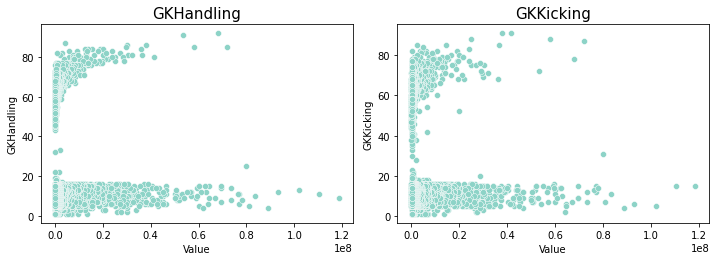

In [ ]:
col = ['GKHandling','GKKicking']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(y=fifa_df[variable],x=fifa_df['Value'])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

* In both the plots we can see two clusters one having GKHandling and GKKicking values between 0-20 and other having from 40 and above.
* The 0-20 cluster tend to have higher Value than the other cluster
* This could be because these features are specifically assigned to GoalKeepers

### GKKicking distribution by position

In [ ]:
fig=px.box(fifa_df2,x='Position',y='GKKicking')
fig.update_layout(title='GKKicking distribution by position')

This explains the clustering in above scatterplots

### Highly positively correlated to Overall

In [ ]:
fifa_df.corr()['Overall'].sort_values(ascending=False)[:10]

Overall                     1.000000
Reactions                   0.850045
Composure                   0.727655
Potential                   0.660939
Value                       0.631848
Special                     0.606960
Release Clause              0.597821
Wage                        0.576150
ShortPassing                0.502550
International Reputation    0.499491
Name: Overall, dtype: float64



*   Reactions, Composure, Potential, Value are the columns highly positively correlated to 'Overall'
*   We will now check their scatterplot with 'Overall'



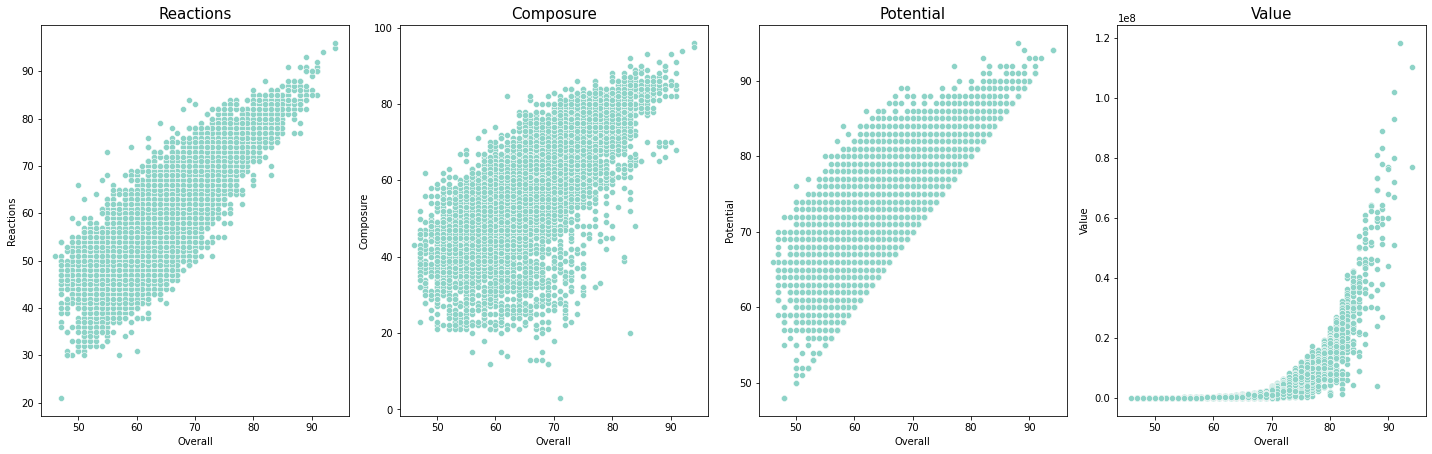

In [ ]:
col = ['Reactions','Composure','Potential','Value']
plt.figure(figsize=(20, 30))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(5, 4, i + 1)
    sns.scatterplot(y=fifa_df[variable],x=fifa_df['Overall'])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()



*   In overall vs potential plot we could see that the potentail is never below the overall score for a particular player
*   The value is almost constant until an overall of 70 and then there is an exponential change in value as overall score increases



### Highly negatively correlated to Overall

In [ ]:
fifa_df.corr()['Overall'].sort_values()[:5]

ID              -0.417025
Jersey Number   -0.218931
GKKicking       -0.029372
GKDiving        -0.025937
GKHandling      -0.025062
Name: Overall, dtype: float64



*   Now we check few columns that are highly negatively correlated to Overall.
*   And we will check the scatterplot for overall vs GKKicking and GKDiving to understand the pattern



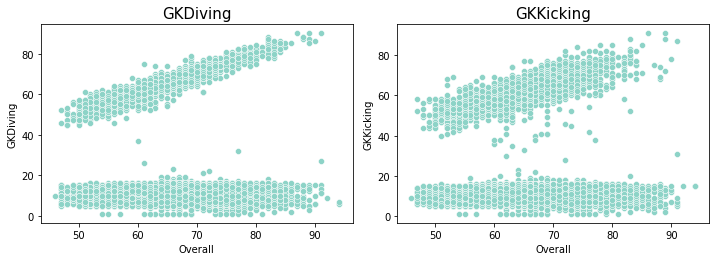

In [ ]:
col = ['GKDiving','GKKicking']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.scatterplot(y=fifa_df[variable],x=fifa_df['Overall'])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()



*   Here also we could see two clusters, one is having GKDiving/GKKicking value in between 0 and 20, while the other have a value above 40.
*   The same pattern as in Value vs  goalkeeper attributes 



### Goal Keeper vs other positions



  

*   Since GoalKeepers seems to be different from other positions we will check this with a scatterplot of overall vs attributes that are not applicable to Goal keepers.


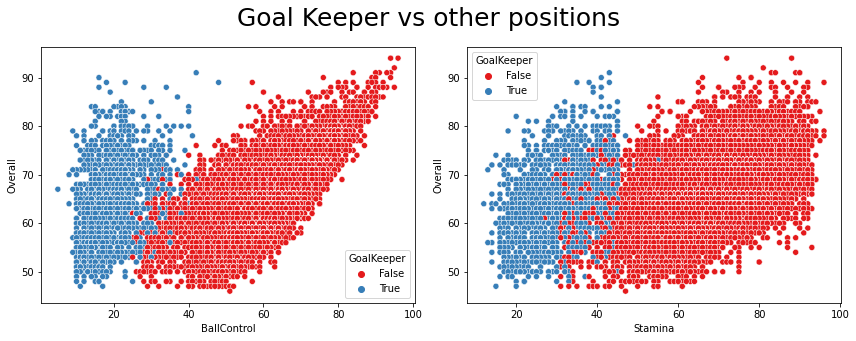

In [ ]:
c=['BallControl','Stamina']
plt.figure(figsize=(12,8))
sns.set_palette('Set1')
for i, variable in enumerate(c):
             plt.subplot(2,2,i+1)
             
             ax=sns.scatterplot(x=fifa_df[variable],y=fifa_df['Overall'],hue=fifa_df['Position']=='GK')
             ax.legend(title='GoalKeeper') 
             plt.tight_layout() 
plt.suptitle("\n".join(['Goal Keeper vs other positions']), y=1.05,size=25); 



*   These shows the seperation of goal keepers compared to rest of the positions
*    This might be because they’re mainly confined to the goal and penalty areas, and exercise a limited range of motion compared to other players.



### Ball Control distribution by position

In [ ]:
fig=px.box(fifa_df2,x='Position',y='BallControl')
fig.update_layout(title='Ball Control distribution by position')

This boxplot explains the cluster in Ball Control vs Overall 

### Reaction vs Composure

In [ ]:
px.scatter(fifa_df,x='Reactions', y='Composure',color='Overall')

We can infer that 'Reactions' and 'Composure' have a positive correlation and 'Overall' score increases along with increase in these two factors.

### Value vs Wage

Text(0.5, 1.03, 'Value vs Wage (International Reputation)')

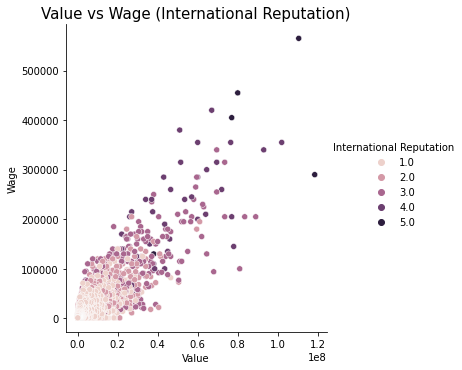

In [ ]:
sns.relplot(x = 'Value', y = 'Wage', hue = 'International Reputation', data = fifa_df2)
plt.title('Value vs Wage (International Reputation)',size=15,y=1.03)

Wage and Value increases with International reputation.

### Value distribution by position

In [ ]:
px.defaults.width = 700
px.defaults.height = 400
fig=px.box(fifa_df2,x='Position',y='Value')
fig.update_layout(title='Value distribution by position')

* Forward and Midfielder positions have more Value outliers.


### Overall score distribution by position

In [ ]:
px.defaults.width = 700
px.defaults.height = 400
fig=px.box(fifa_df2,x='Position',y='Overall')
fig.update_layout(title='Overall distribution by position')



*   The Overall is slightly higher for Midfielder and slightly lower for Goalkeeper compared to other positions




# Comparison

### Overall vs Potential of top 10 nations

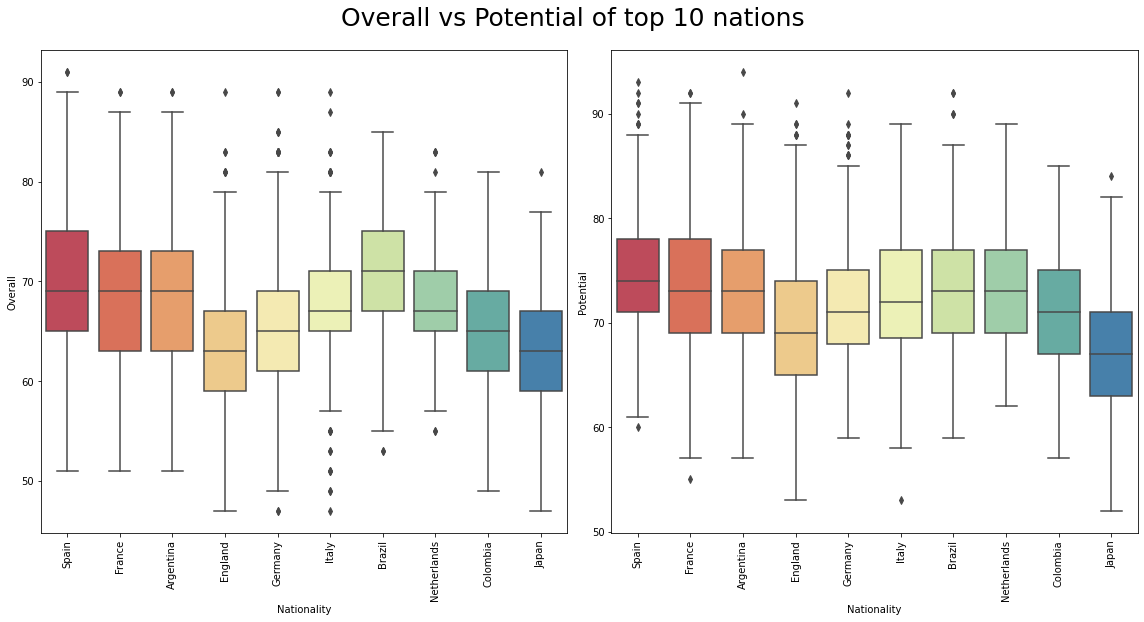

In [ ]:
c = ['Overall','Potential']
vals = ['England','Germany','Spain','Argentina','France','Brazil','Italy','Colombia','Japan','Netherlands']
df_country = fifa_df.loc[fifa_df['Nationality'].isin(vals) & fifa_df['Overall'] ]
plt.figure(figsize=(16,15))
for i, variable in enumerate(c):
             plt.subplot(2,2,i+1)
             
             ax=sns.boxplot(x = 'Nationality', y = variable, data = df_country,palette="Spectral")
             plt.xticks(rotation=90)   
             plt.tight_layout()
plt.suptitle("\n".join(['Overall vs Potential of top 10 nations']), y=1.03,size=25);             



While comparing the Overall and Potential of top 10 nations we get:



* Brazil have high average overall score , followed by Spain, France and Argentina
* While in terms of potential, Spain seems to have overtaken Brazil, followed by Netherlands, France and Argentina
*  This indicates which teams will perform better in coming few years.










###  Overall vs potential of top 10 clubs(by avg overall score)

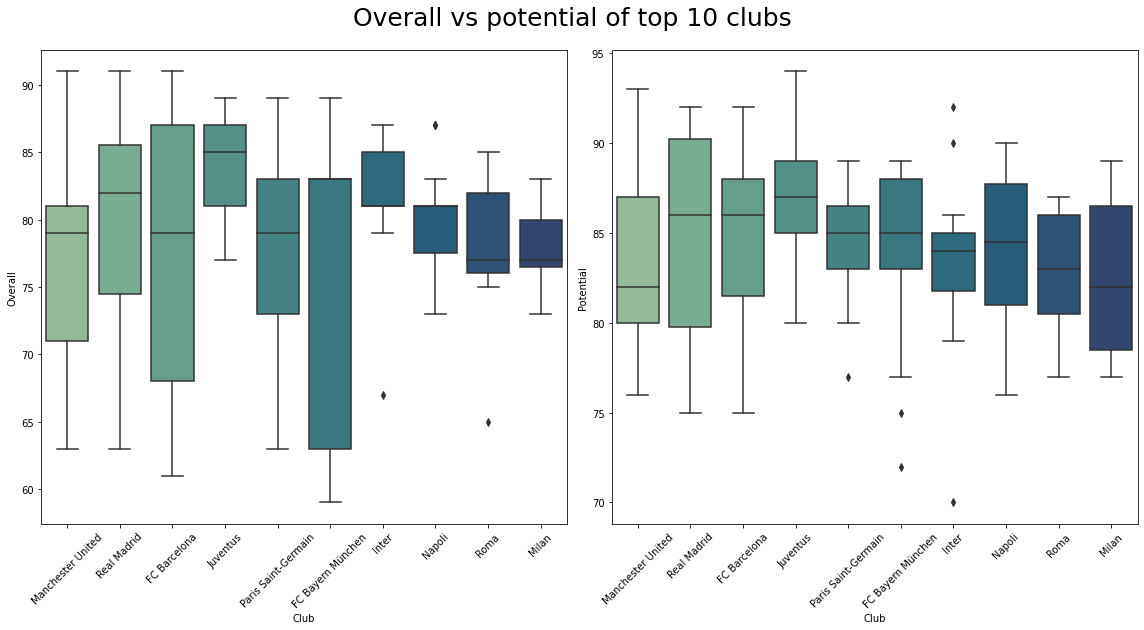

In [ ]:
c = ['Overall','Potential']
vals = ['Juventus', 'Napoli' ,'Inter' ,'Real Madrid','Milan','FC Barcelona','Paris Saint-Germain','Roma','Manchester United','FC Bayern München']
df_country = fifa_df.loc[fifa_df['Club'].isin(vals) & fifa_df['Overall'] ]
plt.figure(figsize=(16,15))
for i, variable in enumerate(c):
             plt.subplot(2,2,i+1)
             
             ax=sns.boxplot(x = 'Club', y = variable, data = df_country,palette="crest")
             plt.xticks(rotation=45)   
             plt.tight_layout() 
plt.suptitle("\n".join(['Overall vs potential of top 10 clubs']), y=1.03,size=25);      



*   The mean overall is seen to be highest for Juventis followed by FC Bayern Munchen and Real Madrid . 
*  In terms of potential also, Juventis is highest while FC Barcelona seems to have overtaken Real Madrid and FC Bayern Munchen also Paris Saint-Germain has overtaken Inter and Napoli, indicating a presence of a lot of young talent at the club.




### Overall vs Value of top players




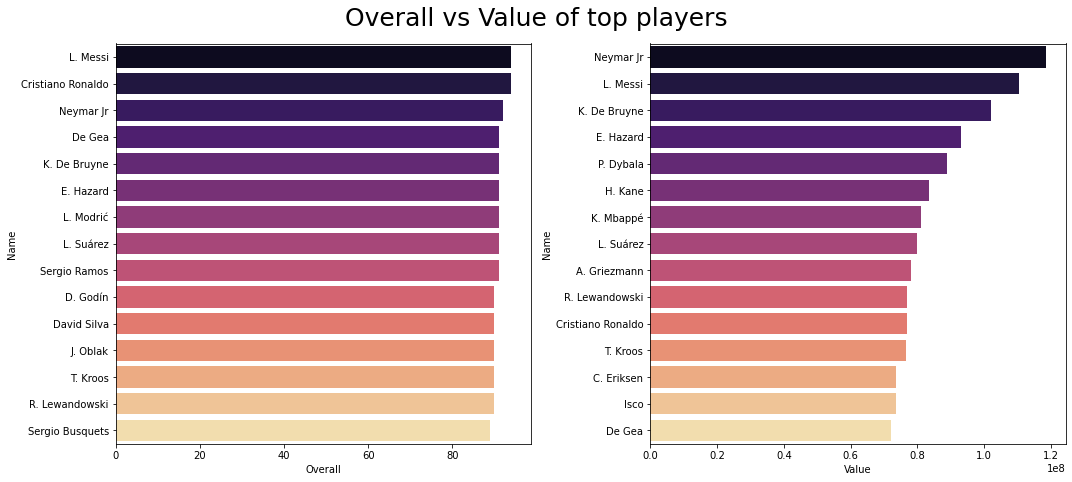

In [ ]:
c = ['Overall','Value']
plt.figure(figsize=(15,12))

for i, variable in enumerate(c):
             plt.subplot(2,2,i+1)
             sns.set_palette('Reds')
             top_10 = fifa_df.sort_values(variable,ascending=False)[:15]
             ax=sns.barplot(x=top_10[variable],y=top_10['Name'],palette="magma")
             plt.tight_layout() 
  
plt.suptitle("\n".join(['Overall vs Value of top players']), y=1.03,size=25);   



*   Comparing overall score and value we can see huge differences
*   L.Messi, Cristiano Ronaldo and Neymar Jr have high overall score in order.
*   While Neymar has overtaken both in terms of value and also Ronaldo is now in the eleventh position 







### Comparing different features by position categories

In [ ]:
fifa_df2.groupby('Position')[['Age','Value','Wage']].mean().round()

,Age,Value,Wage
Position,,,
Defender,25.0,2006261.0,9281.0
Forward,25.0,3016813.0,11846.0
GoalKeeper,26.0,1614517.0,6917.0
Midfielder,25.0,2791667.0,10292.0



Comparing the variables by position(after categorisation)
*   Goalkeepers have slightly high mean age and forward have slightly low mean age.
*   Value and wage are both high for a Forward, while it is very low for a Goal keeper





# PREPROCESSING

## Drop unnecessary columns

In [ ]:
fifa_df.drop(['ID','Real Face','Jersey Number'],axis=1,inplace=True)

# Missing value

In [ ]:
fifa_df.isnull().sum()[fifa_df.isnull().sum()>0].sort_values(ascending=False)

Loaned From                 16943
Joined                       1553
Contract Valid Until          289
Value                         252
Club                          241
Wage                          241
Position                       60
Vision                         48
ShotPower                      48
Jumping                        48
Stamina                        48
Strength                       48
LongShots                      48
Aggression                     48
Interceptions                  48
Positioning                    48
Marking                        48
Penalties                      48
Composure                      48
Reactions                      48
StandingTackle                 48
SlidingTackle                  48
GKDiving                       48
GKHandling                     48
GKKicking                      48
GKPositioning                  48
Balance                        48
BallControl                    48
Agility                        48
Crossing      

In [ ]:
#missing value column names
fifa_df.isnull().sum()[fifa_df.isnull().sum()>0].sort_values(ascending=False).index

Index(['Loaned From', 'Joined', 'Contract Valid Until', 'Value', 'Club',
       'Wage', 'Position', 'Vision', 'ShotPower', 'Jumping', 'Stamina',
       'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning',
       'Marking', 'Penalties', 'Composure', 'Reactions', 'StandingTackle',
       'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning',
       'Balance', 'BallControl', 'Agility', 'Crossing', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Height', 'Weight', 'Finishing', 'SprintSpeed',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'Acceleration', 'GKReflexes'],
      dtype='object')

Loaned from column has 93% missing values so drop it

In [ ]:
fifa_df.drop('Loaned From',axis=1,inplace=True)

### Missing values in ordinal columns

In [ ]:
ord_cols = ['International Reputation','Weak Foot','Skill Moves']
for i in ord_cols:
    fifa_df[i]=fifa_df[i].fillna(fifa_df[i].mode()[0])

Filled with mode

In [ ]:
fifa_df[ord_cols].isnull().sum()

International Reputation    0
Weak Foot                   0
Skill Moves                 0
dtype: int64

### Missing values in categorical cols

In [ ]:
ct_col=['Preferred Foot','Work Rate','Body Type']
for i in ct_col:
    print(i)
    print(fifa_df[i].value_counts())
    print('***********')

Preferred Foot
Right    13948
Left      4211
Name: Preferred Foot, dtype: int64
***********
Work Rate
Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64
***********
Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: Body Type, dtype: int64
***********


 Assign specific body types to the three groups

In [ ]:
fifa_df['Body Type'].replace('Messi','Lean',inplace=True)
fifa_df['Body Type'].replace('C. Ronaldo','Normal',inplace=True)
fifa_df['Body Type'].replace('Neymar','Lean',inplace=True)
fifa_df['Body Type'].replace('Courtois','Lean',inplace=True)
fifa_df['Body Type'].replace('PLAYER_BODY_TYPE_25','Normal',inplace=True)
fifa_df['Body Type'].replace('Shaqiri','Stocky',inplace=True)
fifa_df['Body Type'].replace('Akinfenwa','Stocky',inplace=True)

In [ ]:
fifa_df['Body Type'].value_counts()

Normal    10597
Lean       6420
Stocky     1142
Name: Body Type, dtype: int64

### Fill categorical missing values by mode 

In [ ]:
#fill the missing values with mode
for i in ct_col:
    fifa_df[i]=fifa_df[i].fillna(fifa_df[i].mode()[0])

In [ ]:
fifa_df[ct_col].isnull().sum()

Preferred Foot    0
Work Rate         0
Body Type         0
dtype: int64

### Position and Club

In [ ]:
ct_col_2 = ['Position','Club']
for i in ct_col_2:
    print(i,':',fifa_df[i].nunique())
   

Position : 27
Club : 651


Let's check if positions can be filled according to the scores on different attributes

In [ ]:
fifa_df[fifa_df['Position'].isnull()].index

Int64Index([ 5018,  6736,  7922,  9905, 10628, 13236, 13237, 13238, 13239,
            13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248,
            13249, 13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257,
            13258, 13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266,
            13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275,
            13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283, 16450,
            16539, 16793, 17129, 17339, 17436, 17539],
           dtype='int64')

In [ ]:
fifa_df.loc[[5018,  6736,  7922,  9905, 10628, 13236, 13237, 13238, 13239,
            13240, 13241, 13242, 13243, 13244, 13245, 13246, 13247, 13248,
            13249, 13250, 13251, 13252, 13253, 13254, 13255, 13256, 13257,
            13258, 13259, 13260, 13261, 13262, 13263, 13264, 13265, 13266,
            13267, 13268, 13269, 13270, 13271, 13272, 13273, 13274, 13275,
            13276, 13277, 13278, 13279, 13280, 13281, 13282, 13283, 16450,
            16539, 16793, 17129, 17339, 17436, 17539]].T

,5018,6736,7922,9905,10628,13236,13237,13238,13239,13240,...,13281,13282,13283,16450,16539,16793,17129,17339,17436,17539
Name,R. Raldes,J. Arce,L. Gutiérrez,R. Vargas,D. Bejarano,J. McNulty,J. Barrera,J. Stead,A. Semprini,R. Bingham,...,Jwa Joon Hyeop,O. Marrufo,Han Pengfei,S. Paul,L. Lalruatthara,E. Lyngdoh,J. Singh,S. Passi,D. Lalhlimpuia,C. Singh
Age,37,33,33,23,26,33,29,35,20,24,...,27,25,25,31,23,31,26,23,20,21
Nationality,Bolivia,Bolivia,Bolivia,Bolivia,Bolivia,Scotland,Nicaragua,England,Italy,England,...,Korea Republic,Mexico,China PR,India,India,India,India,India,India,India
Overall,70,68,67,66,65,62,62,62,62,62,...,62,62,62,57,57,56,55,54,54,53
Potential,70,68,67,69,66,62,62,62,72,66,...,62,65,66,57,63,56,58,63,67,62
Club,NaN,NaN,NaN,NaN,NaN,Rochdale,Boyacá Chicó FC,Notts County,Brescia,Hamilton Academical FC,...,Gyeongnam FC,Tiburones Rojos de Veracruz,Guizhou Hengfeng FC,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Value,NaN,NaN,NaN,NaN,NaN,120000.0,300000.0,140000.0,425000.0,400000.0,...,300000.0,375000.0,325000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wage,NaN,NaN,NaN,NaN,NaN,1000.0,1000.0,3000.0,1000.0,1000.0,...,1000.0,2000.0,2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Special,1574,1664,1619,1632,1536,1510,1532,1573,1610,1481,...,1729,1661,1578,1032,1410,1613,1466,1321,1270,1247
Preferred Foot,Right,Left,Right,Right,Right,Right,Right,Right,Right,Right,...,Right,Right,Right,Right,Left,Right,Right,Right,Right,Right


 Except few columns all other cols with missing position also misses attribute scores

 Since club cannot be filled with most frequent one and position can't be assigned based on scores let as assign them as Not Available(N/A)

In [ ]:
for i in ct_col_2:
    fifa_df[i] = fifa_df[i].fillna('N/A')

In [ ]:
fifa_df[ct_col_2].isnull().sum()

Position    0
Club        0
dtype: int64

### Score columns with missing value 

In [ ]:
#considering score cols
mis_cols=['Positioning', 'Balance', 'ShotPower', 'Jumping',
       'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
       'Composure', 'Vision', 'Penalties', 'Agility', 'Marking',
       'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'Reactions', 'BallControl', 'SprintSpeed', 'International Reputation', 'Weak Foot',
       'Skill Moves','Crossing', 'Acceleration', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'GKReflexes']


 All these cols are missing 48 values so let's check whether they are same rows

In [ ]:
fifa_df[fifa_df['GKHandling'].isnull()].T

,13236,13237,13238,13239,13240,13241,13242,13243,13244,13245,...,13274,13275,13276,13277,13278,13279,13280,13281,13282,13283
Name,J. McNulty,J. Barrera,J. Stead,A. Semprini,R. Bingham,K. Dankowski,I. Colman,M. Feeney,R. Minor,Klauss,...,A. Abruscia,E. González,M. Al Amri,J. Rebolledo,C. Mamengi,P. Mazzocchi,Y. Ammour,Jwa Joon Hyeop,O. Marrufo,Han Pengfei
Age,33,29,35,20,24,21,23,19,30,21,...,27,23,26,26,17,22,19,27,25,25
Nationality,Scotland,Nicaragua,England,Italy,England,Poland,Argentina,England,Denmark,Brazil,...,Italy,Venezuela,Saudi Arabia,Chile,Netherlands,Italy,France,Korea Republic,Mexico,China PR
Overall,62,62,62,62,62,62,62,62,62,62,...,62,62,62,62,62,62,62,62,62,62
Potential,62,62,62,72,66,72,70,78,62,69,...,62,70,63,62,79,69,77,62,65,66
Club,Rochdale,Boyacá Chicó FC,Notts County,Brescia,Hamilton Academical FC,Śląsk Wrocław,Club Atlético Aldosivi,Everton,Hobro IK,HJK Helsinki,...,TSV 1860 München,Boyacá Chicó FC,Al Raed,Deportes Iquique,FC Utrecht,Perugia,Montpellier HSC,Gyeongnam FC,Tiburones Rojos de Veracruz,Guizhou Hengfeng FC
Value,120000.0,300000.0,140000.0,425000.0,400000.0,425000.0,450000.0,600000.0,230000.0,425000.0,...,325000.0,375000.0,290000.0,325000.0,550000.0,350000.0,650000.0,300000.0,375000.0,325000.0
Wage,1000.0,1000.0,3000.0,1000.0,1000.0,1000.0,2000.0,5000.0,2000.0,1000.0,...,2000.0,1000.0,3000.0,1000.0,1000.0,1000.0,2000.0,1000.0,2000.0,2000.0
Special,1510,1532,1573,1610,1481,1692,1663,1328,1244,1549,...,1670,1542,1679,1675,1545,1681,1478,1729,1661,1578
Preferred Foot,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right,...,Right,Right,Right,Right,Right,Right,Right,Right,Right,Right


They seem to be of same ID , but we can't drop these rows

Check if outliers present

In [ ]:

for i in mis_cols:
    Q1 = np.nanpercentile(fifa_df[i],25,interpolation='midpoint')
    Q2 = np.nanpercentile(fifa_df[i],50,interpolation='midpoint')
    Q3 = np.nanpercentile(fifa_df[i],75,interpolation='midpoint')
    IQR = Q3-Q1
    low_limit = Q1-1.5*IQR     
    up_limit = Q3 + 1.5*IQR
    outlier=[]
    for x in fifa_df[i]:
        if (x > up_limit) or (x < low_limit) :
            outlier.append(x)
        
    print(i,': ')
    print(len(outlier))
    print('*****************')

Positioning : 
0
*****************
Balance : 
243
*****************
ShotPower : 
15
*****************
Jumping : 
386
*****************
Stamina : 
866
*****************
Strength : 
259
*****************
LongShots : 
0
*****************
Aggression : 
0
*****************
Interceptions : 
0
*****************
Composure : 
155
*****************
Vision : 
63
*****************
Penalties : 
3
*****************
Agility : 
192
*****************
Marking : 
0
*****************
StandingTackle : 
0
*****************
SlidingTackle : 
0
*****************
GKDiving : 
2030
*****************
GKHandling : 
2029
*****************
GKKicking : 
2036
*****************
GKPositioning : 
2032
*****************
Reactions : 
133
*****************
BallControl : 
2044
*****************
SprintSpeed : 
444
*****************
International Reputation : 
1627
*****************
Weak Foot : 
6810
*****************
Skill Moves : 
51
*****************
Crossing : 
0
*****************
Acceleration : 
480
*****************
Finis

Since most col has outlier we will fill them with median of each col

In [ ]:
for i in mis_cols:
    fifa_df[i].fillna(fifa_df.groupby(['Overall'])[i].transform('median'),inplace=True)

## Check height and weight columns

In [ ]:
#consider height weight
fifa_df['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9", nan], dtype=object)

In [ ]:
fifa_df['Height'].dtypes

dtype('O')

Since height is string type with symbols we will convert it into cms

In [ ]:
#first convert cols into numeric type
def changeto_cm(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)*2.54
    return(s)


fifa_df['Height']=fifa_df['Height'].apply(changeto_cm)

In [ ]:
fifa_df['Height'].unique()

array([170.18, 187.96, 175.26, 193.04, 180.34, 172.72, 182.88, 167.64,
       177.8 , 198.12, 185.42, 162.56, 190.5 , 165.1 , 195.58, 200.66,
       160.02, 157.48, 203.2 , 154.94, 205.74,   1.  ])

In [ ]:
fifa_df['Height'].dtypes

dtype('float64')

### Weight

In [ ]:
#Weight
fifa_df['Weight'].unique()

array(['159lbs', '183lbs', '150lbs', '168lbs', '154lbs', '163lbs',
       '146lbs', '190lbs', '181lbs', '192lbs', '176lbs', '172lbs',
       '148lbs', '165lbs', '196lbs', '161lbs', '187lbs', '212lbs',
       '170lbs', '203lbs', '157lbs', '185lbs', '130lbs', '174lbs',
       '207lbs', '134lbs', '141lbs', '152lbs', '179lbs', '132lbs',
       '201lbs', '198lbs', '209lbs', '214lbs', '143lbs', '205lbs',
       '137lbs', '194lbs', '216lbs', '139lbs', '220lbs', '126lbs',
       '218lbs', '123lbs', '227lbs', '128lbs', '223lbs', '225lbs',
       '121lbs', '115lbs', '117lbs', '236lbs', '229lbs', '243lbs', nan,
       '110lbs', '119lbs', '234lbs'], dtype=object)

In [ ]:
fifa_df['Weight'].dtypes

dtype('O')

Since weight is string type with lbs attached to it, we will handle it

In [ ]:
 def cut_lbs(x):
    
    if isinstance(x,str):
        return(x.replace('lbs',''))
    return(x)

fifa_df['Weight'] = fifa_df['Weight'].apply(cut_lbs).astype('float')

In [ ]:
fifa_df['Weight'].unique()

array([159., 183., 150., 168., 154., 163., 146., 190., 181., 192., 176.,
       172., 148., 165., 196., 161., 187., 212., 170., 203., 157., 185.,
       130., 174., 207., 134., 141., 152., 179., 132., 201., 198., 209.,
       214., 143., 205., 137., 194., 216., 139., 220., 126., 218., 123.,
       227., 128., 223., 225., 121., 115., 117., 236., 229., 243.,  nan,
       110., 119., 234.])

In [ ]:
fifa_df['Weight'].dtypes

dtype('float64')

Check for outliers

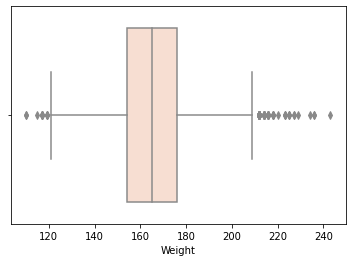

In [ ]:
sns.boxplot(fifa_df['Weight'])

Since outliers are present we fill mis vals with median

In [ ]:
fifa_df['Height'].fillna(fifa_df['Height'].median(),inplace=True)
fifa_df['Weight'].fillna(fifa_df['Weight'].median(),inplace=True)

In [ ]:
fifa_df[['Height','Weight']].isnull().sum()

Height    0
Weight    0
dtype: int64

## Joined and Contract Valid Until 

Since these missing data cannot be filled with mode we assign N/A

In [ ]:
#fill joind and contract with N/A
fifa_df['Joined'].fillna('N/A',inplace=True)
fifa_df['Contract Valid Until'].fillna('N/A',inplace=True)

## Value and Wage

In [ ]:
# Value , Wage
fifa_df[['Value','Wage']].isnull().sum()

Value    252
Wage     241
dtype: int64

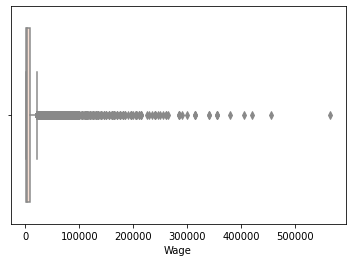

In [ ]:
sns.boxplot(fifa_df['Wage'])

Since Value and Wage depends on International Reputation and since both contains lot of outliers we will fill the missing data with median in each group

In [ ]:
pd.DataFrame(fifa_df.groupby(['International Reputation'])[['Value','Wage']].median())

,Value,Wage
International Reputation,,
1.0,625000.0,3000.0
2.0,6500000.0,25000.0
3.0,17500000.0,70500.0
4.0,37500000.0,165000.0
5.0,78500000.0,347500.0


In [ ]:
fifa_df['Value'] = fifa_df['Value'].fillna(fifa_df.groupby(['International Reputation'])['Value'].transform('median'))
fifa_df['Wage'] = fifa_df['Wage'].fillna(fifa_df.groupby(['International Reputation'])['Wage'].transform('median'))

## Recheck missing values

In [ ]:
fifa_df.isnull().sum()

Name                        0
Age                         0
Nationality                 0
Overall                     0
Potential                   0
Club                        0
Value                       0
Wage                        0
Special                     0
Preferred Foot              0
International Reputation    0
Weak Foot                   0
Skill Moves                 0
Work Rate                   0
Body Type                   0
Position                    0
Joined                      0
Contract Valid Until        0
Height                      0
Weight                      0
Crossing                    0
Finishing                   0
HeadingAccuracy             0
ShortPassing                0
Volleys                     0
Dribbling                   0
Curve                       0
FKAccuracy                  0
LongPassing                 0
BallControl                 0
Acceleration                0
SprintSpeed                 0
Agility                     0
Reactions 

# Outlier Detection

During EDA process as well as missing value treatment we have found that a lot of columns have outliers in them. Let us once again check these columns.

In [ ]:
fifa_df.select_dtypes(include=['float64','int64']).columns

Index(['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

### Age, Overall, Potential

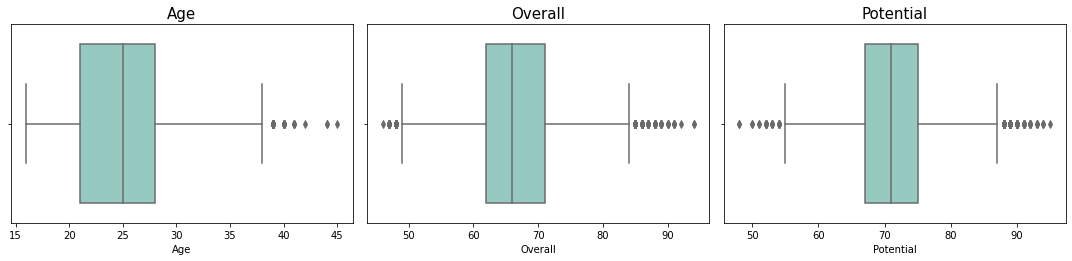

In [ ]:
col = ['Age', 'Overall', 'Potential']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=fifa_df[variable])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

### Value, Wage

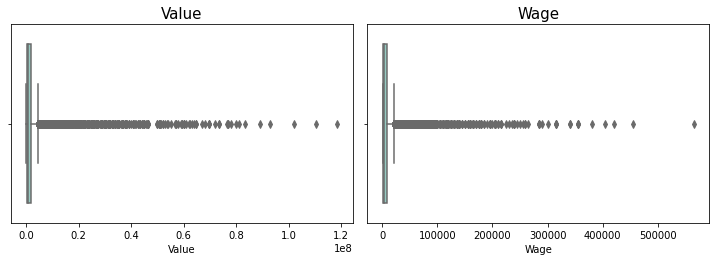

In [ ]:
col=['Value','Wage']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=fifa_df[variable])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

Value and Wage depends on a players International Reputation and Overall score . This can't be handled

### Height, Weight

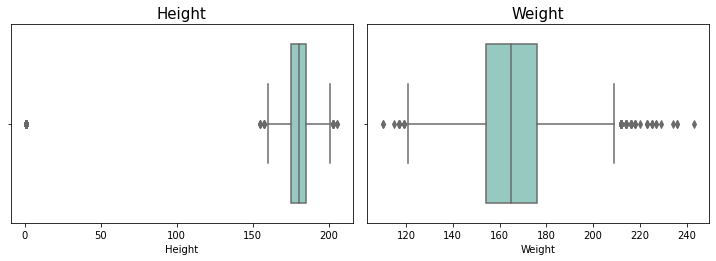

In [ ]:
col=['Height','Weight']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=fifa_df[variable])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

In Height one value seems to be near 0 which is not possible. So let us replace it

In [ ]:
fifa_df['Height'].unique()

array([170.18, 187.96, 175.26, 193.04, 180.34, 172.72, 182.88, 167.64,
       177.8 , 198.12, 185.42, 162.56, 190.5 , 165.1 , 195.58, 200.66,
       160.02, 157.48, 203.2 , 154.94, 205.74,   1.  ])

That value is 1. So let us replace it with median height

In [ ]:
fifa_df['Height'].replace(1.,fifa_df['Height'].median(),inplace=True)

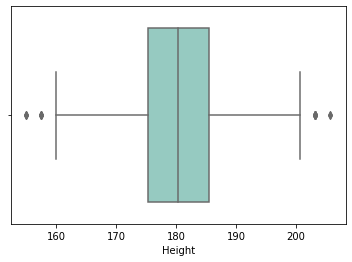

In [ ]:
sns.boxplot(fifa_df['Height'])

### Check on scores for players' power features

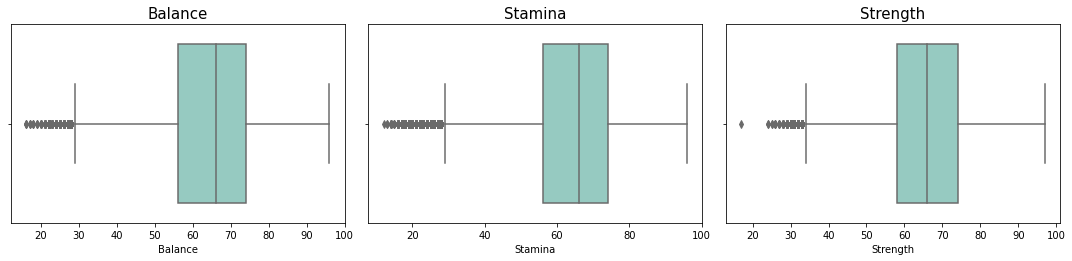

In [ ]:
col=['Balance', 'Stamina','Strength']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=fifa_df[variable])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

The outliers seen are actually for the position GoalKeepers which we discussed in EDA. We can't drop or replace them

### Scores specific to goalkeepers

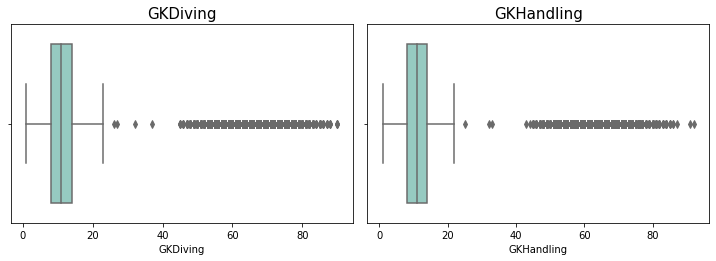

In [ ]:
col=['GKDiving','GKHandling']
plt.figure(figsize=(15, 20))
sns.set_palette('Set3')
for i, variable in enumerate(col):
    plt.subplot(6, 3, i + 1)
    sns.boxplot(x=fifa_df[variable])
    plt.tight_layout()
    plt.title(variable,size=15,y=1.03)

plt.show()

These values are specifically for GoalKeepers so they alone have high values, we cannot drop or replace them

# Feature Engineering on  numeric columns

<ul>
<li>Forward Attributes: 'BallControl', 'Positioning', 'Reactions','Composure', 'Finishing', 'ShotPower','ShortPassing', 
                    'Dribbling', 'Volleys', 'LongShots'
<li>Midfielder Attributes: 'BallControl', 'Reactions','ShortPassing','Composure', 'Vision','Dribbling', 
                       'LongShots', 'LongPassing'
<li>Defender Attributes: 'StandingTackle', 'Interceptions', 'SlidingTackle', 'Reactions', 'Marking', 'Composure', 'ShortPassing'
<li>Goalkeeper Attributes: 'GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'Reactions', 'GKKicking'
</ul>
We can calculate score specific to each position for every player based on the above classification. This will give the users
an idea about which position a player is best suited at. We may also drop the above feature columns for our further analysis.
Further in case of creating new players in the game, the users will have a better control on the features required for 
the player.

### Categorising positions 
 Adding a new column for the groups

In [ ]:
def transform_positions(df):
    for i in ['ST', 'CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW']:
        df.loc[df.Position_group == i , 'Position_group'] = 'Striker' 
    
    for i in ['CAM', 'CDM', 'LCM', 'CM', 'LAM', 'LDM', 'LM', 'RAM', 'RCM', 'RDM', 'RM']:
        df.loc[df.Position_group == i , 'Position_group'] = 'Midfielder' 
    
    for i in ['CB', 'LB', 'LCB', 'LWB', 'RB', 'RCB', 'RWB']:
        df.loc[df.Position_group == i , 'Position_group'] = 'Defender'
    
    for i in ['GK']:
        df.loc[df.Position_group == i, 'Position_group'] = 'Goal Keeper'
       

In [ ]:
#create a new col names as Position_group for categorising the positions
fifa_df['Position_group'] = fifa_df['Position']
transform_positions(fifa_df)

Forward Score

In [ ]:
forward_cols = ['BallControl', 'Positioning', 'Reactions','Composure', 'Finishing', 'ShotPower','ShortPassing', 
                'Dribbling', 'Volleys', 'LongShots']
for i in forward_cols:
    sum_fscore = (fifa_df['BallControl'] + fifa_df['Positioning'] + fifa_df['Reactions'] + fifa_df['Composure']
                                       + fifa_df['Finishing'] + fifa_df['ShotPower'] + fifa_df['ShortPassing'] +
                                       fifa_df['Dribbling'] + fifa_df['Volleys'] + fifa_df['LongShots'])
    fifa_df['forward_score'] = round(sum_fscore / len(forward_cols))

Midfielder Score

In [ ]:
midfielder_cols = ['BallControl', 'Reactions','ShortPassing','Composure', 'Vision','Dribbling', 
                                 'LongShots', 'LongPassing']
for i in forward_cols:
    sum_mscore = (fifa_df['BallControl'] + fifa_df['Reactions'] + fifa_df['ShortPassing'] +fifa_df['Composure']
                  + fifa_df['Vision'] + fifa_df['Dribbling'] + fifa_df['LongShots'] + fifa_df['LongPassing'])
    fifa_df['midfielder_score'] = round(sum_mscore / len(midfielder_cols))

Defender score

In [ ]:
defender_cols = ['StandingTackle', 'Interceptions', 'SlidingTackle', 'Reactions', 'Marking', 'Composure', 'ShortPassing']
for i in defender_cols:
    sum_dscore = (fifa_df['StandingTackle'] + fifa_df['Interceptions'] + fifa_df['SlidingTackle'] +fifa_df['Reactions']
                  + fifa_df['Marking'] + fifa_df['Composure'] + fifa_df['ShortPassing'])
    fifa_df['defender_score'] = round(sum_dscore / len(defender_cols))

Goalkeeper score

In [ ]:
goalkeeper_cols = ['GKReflexes', 'GKDiving', 'GKPositioning', 'GKHandling', 'Reactions', 'GKKicking']
for i in goalkeeper_cols:
    sum_gscore = (fifa_df['GKReflexes'] + fifa_df['GKDiving'] + fifa_df['GKPositioning'] +fifa_df['GKHandling']
                  + fifa_df['Reactions'] + fifa_df['GKKicking'])
    fifa_df['goalkeeper_score'] = round(sum_gscore / len(goalkeeper_cols))

In [ ]:
fifa_df[['Name', 'Position_group', 'forward_score', 'midfielder_score', 'defender_score', 'goalkeeper_score']]

,Name,Position_group,forward_score,midfielder_score,defender_score,goalkeeper_score
0,L. Messi,Striker,93.0,94.0,56.0,25.0
1,Cristiano Ronaldo,Striker,92.0,88.0,55.0,26.0
2,Neymar Jr,Striker,88.0,89.0,56.0,26.0
3,De Gea,Goal Keeper,35.0,50.0,41.0,89.0
4,K. De Bruyne,Midfielder,88.0,90.0,73.0,24.0
...,...,...,...,...,...,...
18202,J. Lundstram,Midfielder,41.0,45.0,46.0,16.0
18203,N. Christoffersson,Striker,42.0,38.0,28.0,14.0
18204,B. Worman,Striker,43.0,41.0,28.0,14.0
18205,D. Walker-Rice,Striker,44.0,41.0,29.0,12.0


# Encoding and Feature Engineering on Object type columns

Checking the object columns 

In [ ]:
fifa_df.select_dtypes(['object']).columns

Index(['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Joined', 'Contract Valid Until',
       'Position_group'],
      dtype='object')

Check number of unique values

In [ ]:

obj_cols= ['Name', 'Nationality', 'Club', 'Preferred Foot', 'Work Rate',
       'Body Type', 'Position', 'Joined', 'Contract Valid Until']
for i in obj_cols:
    print(i, ':', len(fifa_df[i].unique()))
    print('____________')

Name : 17194
____________
Nationality : 164
____________
Club : 652
____________
Preferred Foot : 2
____________
Work Rate : 9
____________
Body Type : 3
____________
Position : 28
____________
Joined : 1737
____________
Contract Valid Until : 37
____________


### Name , Nationality
The variables 'Name', 'Nationality' have no effect on our study variables 'Value'. Hence they can be dropped.

In [ ]:
fifa_df.drop(['Name', 'Nationality'], axis = 1, inplace = True)

### Contract valid until

In [ ]:
#encoding contract valid until by year (expired/ongoing)
fifa_df['Contract Valid Until'] = fifa_df['Contract Valid Until'].map(lambda x: 1 if (x == '2022' or x == '2023') else 0)

In [ ]:
fifa_df['Contract Valid Until'].value_counts() # 0 = expired, 1 = ongoing

0    15677
1     2530
Name: Contract Valid Until, dtype: int64

### Joined 

In [ ]:
#split Joined column into month and year
fifa_df['Joined'] = fifa_df['Joined'].str.split(',')
fifa_df['Join_Month'] = fifa_df['Joined'].str.get(0)
fifa_df['Join_Year'] = fifa_df['Joined'].str.get(1)

In [ ]:
#we require only Join_Year
fifa_df = fifa_df.drop(['Joined','Join_Month'],axis=1)

In [ ]:
fifa_df['Join_Year'].unique()

array([' 2004', ' 2018', ' 2017', ' 2011', ' 2015', ' 2012', ' 2014',
       ' 2005', ' 2010', ' 2016', ' 2008', ' 2013', nan, ' 2007', ' 2009',
       ' 2002', ' 2003', ' 2006', ' 2001', ' 1991', ' 1998', ' 2000',
       ' 1999'], dtype=object)

In [ ]:
#fill null value as N/A
fifa_df['Join_Year'] = fifa_df['Join_Year'].fillna('N/A')

In [ ]:
fifa_df['Position_group'].value_counts()

Midfielder     6838
Defender       5866
Striker        3418
Goal Keeper    2025
N/A              60
Name: Position_group, dtype: int64

### Position
One hot encoding Position_group column and droping Position column

In [ ]:
# onehot encoding position
fifa_df = pd.get_dummies(fifa_df,columns=['Position_group'])
# droping position column
fifa_df = fifa_df.drop('Position',axis=1)

### Work Rate

Split the work rate column into attack and defence rate and then encode them

In [ ]:
fifa_df['Work Rates'] = fifa_df['Work Rate'].str.split('/ ')
fifa_df['Attack Rate'] = fifa_df['Work Rates'].str.get(0)
fifa_df['Defence Rate']=fifa_df['Work Rates'].str.get(1)

 Encoding values 1,2,3 to low, medium and high respectively

In [ ]:

fifa_df.loc[fifa_df['Attack Rate'] == "Low", 'Attack Rate'] = 1
fifa_df.loc[fifa_df['Attack Rate'] == "Medium", 'Attack Rate'] = 2
fifa_df.loc[fifa_df['Attack Rate'] == "High", 'Attack Rate'] = 3

fifa_df.loc[fifa_df['Defence Rate'] == "Low", 'Defence Rate'] = 1
fifa_df.loc[fifa_df['Defence Rate'] == "Medium", 'Defence Rate'] = 2
fifa_df.loc[fifa_df['Defence Rate'] == "High", 'Defence Rate'] = 3

Checking the data type of new columns

In [ ]:
fifa_df[['Attack Rate','Defence Rate']].dtypes

Attack Rate     object
Defence Rate    object
dtype: object

Since they are object type we will convert them into numeric type

In [ ]:
fifa_df[['Attack Rate','Defence Rate']] = fifa_df[['Attack Rate','Defence Rate']].apply(pd.to_numeric)

In [ ]:
fifa_df[['Attack Rate','Defence Rate']].dtypes

Attack Rate     int64
Defence Rate    int64
dtype: object

Droping Work rate column

In [ ]:
fifa_df.drop('Work Rate',axis=1,inplace=True)
fifa_df.drop('Work Rates',axis=1,inplace=True)

### Preferred foot

In [ ]:
fifa_df['Preferred Foot'].value_counts()

Right    13996
Left      4211
Name: Preferred Foot, dtype: int64

 Label encoding the column

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
fifa_df['Preferred Foot'] = le.fit_transform(fifa_df['Preferred Foot'])

### Body Type

In [ ]:
fifa_df['Body Type'].value_counts()

Normal    10645
Lean       6420
Stocky     1142
Name: Body Type, dtype: int64

One-hot encoding the column

In [ ]:
#one hot encoding
fifa_df = pd.get_dummies(fifa_df,columns=['Body Type'])

### Checking number of columns

In [ ]:
fifa_df.shape

(18207, 64)

# Feature Scaling

In [ ]:
fifa_df.columns

Index(['Age', 'Overall', 'Potential', 'Club', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Contract Valid Until', 'Height', 'Weight', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause',
       'forward_score', 'midfielder_score', 'defender_score',
       'goalkeeper_score', 'Join_Year', 'Position_group_Defender',
       'Position_group_Goal Keeper', 'Position_group_Midfielder',
       'Position_group_N/A', 'Position_group_Striker', 'Attack Rate',
 

### Splitting target variable from attributes 

In [ ]:
X = fifa_df.drop(['Value','Join_Year','Club','Contract Valid Until'],axis=1)
y= fifa_df['Value']

In [ ]:
X.columns

Index(['Age', 'Overall', 'Potential', 'Wage', 'Special', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Height',
       'Weight', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'forward_score', 'midfielder_score', 'defender_score',
       'goalkeeper_score', 'Position_group_Defender',
       'Position_group_Goal Keeper', 'Position_group_Midfielder',
       'Position_group_N/A', 'Position_group_Striker', 'Attack Rate',
       'Defence Rate', 'Body Type_Lean', 'Body Type_Normal',
 

## Standard scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_X=pd.DataFrame(scale.fit_transform(X))

### Applying linear regression model so as to compare the R square value

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, random_state=42, test_size=0.20)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

In [ ]:
#standard scaling
print('R squared value is', r2_score(y_test, predictions))

R squared value is 0.9683791456874671


### Without scaling

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('R squared value is', r2_score(y_test, predictions))

R squared value is 0.9684562804401997


### Normalize

In [ ]:
#normalizing
from sklearn import preprocessing
x = preprocessing.normalize(X)
x = pd.DataFrame(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)
print('R squared value is', r2_score(y_test, predictions))

R squared value is 0.044510867720282565


### Min-max scaling

In [ ]:
min_max = preprocessing.MinMaxScaler(feature_range=(0,1))
x = min_max.fit_transform(X)
x = pd.DataFrame(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.20)
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

print('R squared value is', r2_score(y_test, predictions))

R squared value is 0.9473332521865622


* Standard Scaling and min max scaling has no drastic effect on the model as  r_2 value is almost same before and after. But Normalizing has decreased the r_2 value by a large amount.




# Feature Reduction

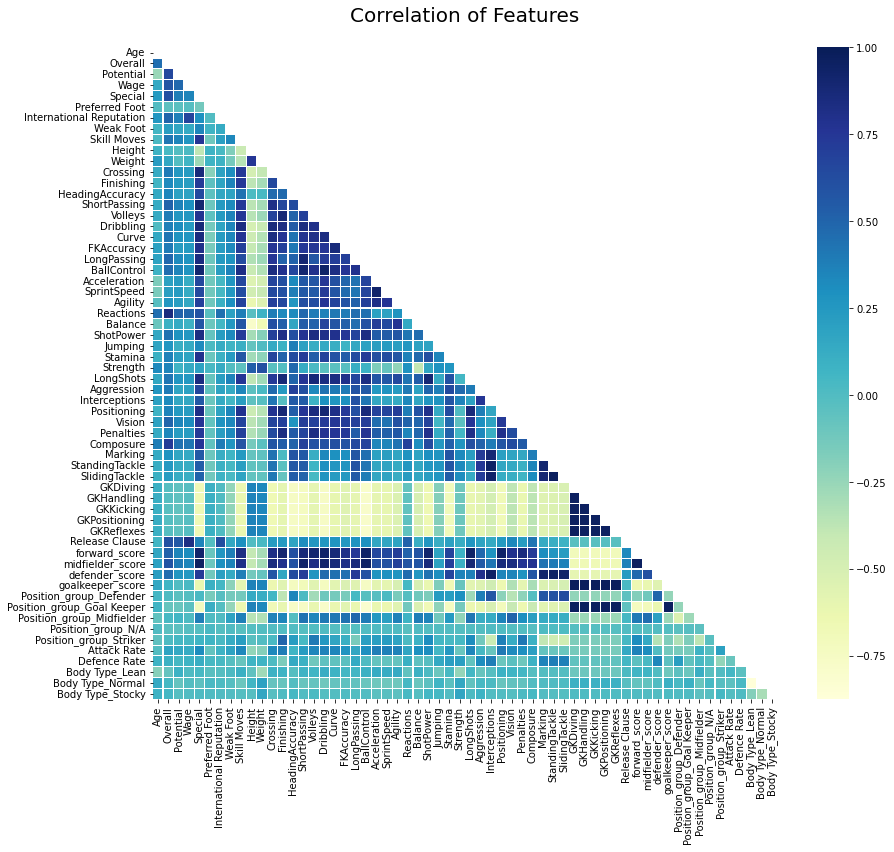

In [ ]:
plt.figure(figsize=(14,12))
matrix = np.triu(X.corr())
plt.title('Correlation of Features',size=20,y=1.03)
sns.heatmap(X.corr(),linewidths=0.1,vmax=1.0, 
            square=False, linecolor='white', annot=False,cmap="YlGnBu",mask=matrix);

### Drop the 'Special' column

This attribute is highly correlated to the forward_score, midfielder_score and defender_score columns. Hence we can drop it.

In [ ]:
X = X.drop(['Special'],axis=1)


### Droping individual score columns

We can drop these columns since we have already created new columns containing average score by postion group of each player.

In [ ]:
#drop columns
X = X.drop(['BallControl', 'Positioning', 'Reactions','Composure', 'Finishing', 'ShotPower','ShortPassing', 
                'Dribbling', 'Volleys', 'LongShots', 'BallControl', 'Reactions','ShortPassing','Composure', 'Vision',
                         'Dribbling','LongShots', 'LongPassing', 'StandingTackle', 'Interceptions', 'SlidingTackle', 
                         'Reactions', 'Marking', 'Composure', 'ShortPassing','GKReflexes', 'GKDiving', 'GKPositioning', 
                         'GKHandling', 'Reactions', 'GKKicking'], axis = 1)



# Dataset after preprocessing

In [ ]:
X.head().T

,0,1,2,3,4
Age,3.100000e+01,3.300000e+01,2.600000e+01,2.700000e+01,2.700000e+01
Overall,9.400000e+01,9.400000e+01,9.200000e+01,9.100000e+01,9.100000e+01
Potential,9.400000e+01,9.400000e+01,9.300000e+01,9.300000e+01,9.200000e+01
Wage,5.650000e+05,4.050000e+05,2.900000e+05,2.600000e+05,3.550000e+05
Preferred Foot,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
International Reputation,5.000000e+00,5.000000e+00,5.000000e+00,4.000000e+00,4.000000e+00
Weak Foot,4.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,5.000000e+00
Skill Moves,4.000000e+00,5.000000e+00,5.000000e+00,1.000000e+00,4.000000e+00
Height,1.701800e+02,1.879600e+02,1.752600e+02,1.930400e+02,1.803400e+02
Weight,1.590000e+02,1.830000e+02,1.500000e+02,1.680000e+02,1.540000e+02


In [ ]:
X.shape

(18207, 38)

* The number of rows remains the same as we haven't dropped any player details
* Previously we had 59 columns but now we have reduced it into 39

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         18207 non-null  int64  
 1   Overall                     18207 non-null  int64  
 2   Potential                   18207 non-null  int64  
 3   Wage                        18207 non-null  float64
 4   Preferred Foot              18207 non-null  int64  
 5   International Reputation    18207 non-null  float64
 6   Weak Foot                   18207 non-null  float64
 7   Skill Moves                 18207 non-null  float64
 8   Height                      18207 non-null  float64
 9   Weight                      18207 non-null  float64
 10  Crossing                    18207 non-null  float64
 11  HeadingAccuracy             18207 non-null  float64
 12  Curve                       18207 non-null  float64
 13  FKAccuracy                  182

All the columns are numeric type

In [ ]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,18207.0,2.512221e+01,4.669943e+00,16.00,21.00,25.00,2.800000e+01,4.500000e+01
Overall,18207.0,6.623870e+01,6.908930e+00,46.00,62.00,66.00,7.100000e+01,9.400000e+01
Potential,18207.0,7.130730e+01,6.136496e+00,48.00,67.00,71.00,7.500000e+01,9.500000e+01
Wage,18207.0,9.790438e+03,2.199195e+04,1000.00,1000.00,3000.00,9.000000e+03,5.650000e+05
Preferred Foot,18207.0,7.687153e-01,4.216656e-01,0.00,1.00,1.00,1.000000e+00,1.000000e+00
International Reputation,18207.0,1.112924e+00,3.935538e-01,1.00,1.00,1.00,1.000000e+00,5.000000e+00
Weak Foot,18207.0,2.947438e+00,6.595906e-01,1.00,3.00,3.00,3.000000e+00,5.000000e+00
Skill Moves,18207.0,2.360356e+00,7.553938e-01,1.00,2.00,2.00,3.000000e+00,5.000000e+00
Height,18207.0,1.812552e+02,6.721432e+00,154.94,175.26,180.34,1.854200e+02,2.057400e+02
Weight,18207.0,1.659765e+02,1.557286e+01,110.00,154.00,165.00,1.760000e+02,2.430000e+02


# Modeling

As our aim is to predict the value of a player with the given attributes, we will first use different regression models and compare few metrics to find which one is the best 

Since our target variable is a large digit number we will convert it into a two digit float value using the formula log(x+1) where x is the individual value.

In [ ]:
y[:5]

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

In [ ]:
y = np.log1p(fifa_df['Value'])

In [ ]:
y[:5]

0    18.520526
1    18.159316
2    18.590424
3    18.092177
4    18.440483
Name: Value, dtype: float64

The column 'Release Clause' is highly correlated to 'Value' but 'Release Caluse' is dependent on 'Value' and not the other way around. So we will drop it.

In [ ]:
X = X.drop('Release Clause',axis=1)

### Train-test split the data

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [ ]:
print('X_train: ',X_train.shape)
print('X_test: ',X_test.shape)
print('y_train: ',len(y_train))
print('y_test: ',len(y_test))

X_train:  (14565, 37)
X_test:  (3642, 37)
y_train:  14565
y_test:  3642


Now we will apply different regression models on our dataset. And we are going to use the metrics mean squared error and R square values to compare the efficiency of each model

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
model_l = lr.fit(X_train, y_train)
pred_l = model_l.predict(X_test)
mse_l=mean_squared_error(y_test,pred_l)
r2_l= r2_score(y_test, pred_l)
print('MSE for Linear Regression: ',mse_l)
print('R squared value for Linear Regression: ',r2_l)

MSE for Linear Regression:  0.07351576297156073
R squared value for Linear Regression:  0.9611268613275727


## Ridge 

In [ ]:
from sklearn.linear_model import RidgeCV
ridge_cv_model = RidgeCV()
ridge_cv_model.fit(X_train,y_train)
pred_ri = ridge_cv_model.predict(X_test)
mse_ridge=mean_squared_error(y_test,pred_ri)
r2_ridge= r2_score(y_test, pred_ri)
print('MSE: ',mse_ridge)
print('R squared value is', r2_ridge)

MSE:  0.07347123890998213
R squared value is 0.9611504044420022


## Lasso

In [ ]:
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV()
lasso_cv_model.fit(X_train,y_train)
pred_la =lasso_cv_model.predict(X_test)
mse_la=mean_squared_error(y_test,pred_la)
r2_la= r2_score(y_test, pred_la)
print('MSE: ',mse_la)
print('R squared value is', r2_la)

MSE:  1.30314520376673
R squared value is 0.31093221142343075


## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_d = DecisionTreeRegressor()
model_d.fit(X_train, y_train)
pred_d = model_d.predict(X_test)
mse_d=mean_squared_error(y_test,pred_d)
r2_d= r2_score(y_test, pred_d)
print('MSE: ',mse_d)
print('R squared value is', r2_d)

MSE:  0.045531110091710604
R squared value is 0.9759243856696513


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)
mse_rf=mean_squared_error(y_test,pred_rf)
r2_rf= r2_score(y_test, pred_rf)
print('MSE: ',mse_rf)
print('R squared value is', r2_rf)

MSE:  0.022197342094072963
R squared value is 0.9882626484103006


## XGBoost

In [ ]:
from xgboost import XGBRegressor
model_x = XGBRegressor()
model_x.fit(X_train, y_train)
pred_x = model_x.predict(X_test)
mse_x=mean_squared_error(y_test,pred_x)
r2_x= r2_score(y_test, pred_x)
print('MSE: ',mse_x)
print('R squared value is', r2_x)

[05:00:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MSE:  0.024572617040506197
R squared value is 0.9870066675342869


## Comparing MSE and R square 

In [ ]:
comp = pd.DataFrame({'Linear Regression':[mse_l,r2_l],
                    'Ridge Regression':[mse_ridge,r2_ridge],
                     'Lasso Regression':[mse_la,r2_la],
                      'DecisionTree':[mse_d,r2_d],
                     'RandomForest':[mse_rf,r2_rf],
                     'XGBRegressor':[mse_x,r2_x]
                    
                    },index=['MSE','r2_score'])
comp.transpose()

,MSE,r2_score
Linear Regression,0.073516,0.961127
Ridge Regression,0.073471,0.961150
Lasso Regression,1.303145,0.310932
DecisionTree,0.045531,0.975924
RandomForest,0.022197,0.988263
XGBRegressor,0.024573,0.987007


* All models except Lasso regression have MSE less than 1 and R square greater than 0.95
* By comparing these values we get Random Forest has the least MSE and highest R square hence it is the best fitted model for our data set.

### Plotting actual y-value vs predicted y-value  for test set


Text(0, 0.5, 'Predicted y')

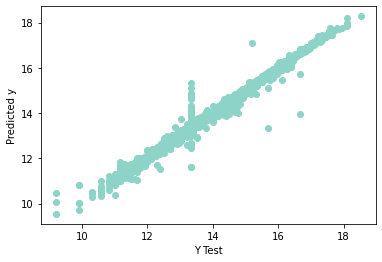

In [ ]:
plt.scatter(y_test, pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted y')

It is almost a straight line with few outliers showing the best fitting of Random Forest Regressor

### Comparing Actual vs Predicted by Value

Checking first few Values on scaled y data

In [ ]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_y": pred_rf } )
y_pred_rf1[:5]

,actual,predicted_y
5848,13.997833,13.971148
14634,12.506181,12.476241
11807,12.899222,12.930704
5826,13.560620,13.563776
1989,16.012735,15.906089


Checking first few Values on original y data

In [ ]:
back_y = np.expm1(y_test)
back_pred = np.expm1(pred_rf)
y_pred_rf1 = pd.DataFrame( { "actual": back_y, 
"predicted_y": np.round(back_pred) } )
y_pred_rf1[:5]

,actual,predicted_y
5848,1200000.0,1168401.0
14634,270000.0,262036.0
11807,400000.0,412793.0
5826,775000.0,777450.0
1989,9000000.0,8089588.0


### Feature Importance

In [ ]:
pd.Series(model_rf.feature_importances_, index=X.columns).sort_values(ascending=False)*100

Overall                       86.570417
Potential                      6.466733
Age                            4.685912
forward_score                  0.607798
Wage                           0.379701
defender_score                 0.137248
Penalties                      0.125879
Curve                          0.077748
midfielder_score               0.075284
HeadingAccuracy                0.065511
Position_group_Defender        0.062131
Crossing                       0.060172
Jumping                        0.059047
FKAccuracy                     0.058750
Aggression                     0.057566
goalkeeper_score               0.056809
Stamina                        0.055257
Position_group_N/A             0.050113
SprintSpeed                    0.043742
Agility                        0.042443
Strength                       0.040435
Acceleration                   0.039037
Weight                         0.032648
Balance                        0.029977
Height                         0.024319


Overall ,Potential ,Age  ,forward_score, Wage ,Penalties ,defender_score these are few columns that highly contribute to random forest regression

# Fine tuning 
We will try to improve our random forest model by hyper parameter tuning.
Randomized search as well as Grid search are used here


## Randomized Search

In [194]:
from sklearn.model_selection import RandomizedSearchCV

grid_param = {
"n_estimators"      : [20,60,100],
"max_features"      : ["auto", "sqrt"],
"min_samples_split" : [4,8],
"bootstrap": [True, False]
}
model_rf2 = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = model_rf2,param_distributions = grid_param,cv=3,scoring='r2')
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [4, 8],
                                        'n_estimators': [20, 60, 100]},
                   scoring='r2')

In [195]:
rf_random.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 100}

In [199]:
model_rf2 = RandomForestRegressor(n_estimators=100,min_samples_split=8,max_features='auto',bootstrap=True)
model_rf2.fit(X_train,y_train)
pred_rf = model_rf2.predict(X_test)
print('MSE: ',mean_squared_error(y_test,pred_rf))
print('R2 score : ',r2_score(y_test,pred_rf))

MSE:  0.02199900845714144
R2 score :  0.9883675218505019


* This has improved our model by slightly decreasing the MSE and slightly increasing the R square
*  But we will also try Grid Search to get a better results

## Grid Search 

In [207]:
from sklearn.model_selection import GridSearchCV

grid_param = {
"n_estimators"      : [20,60,100],
"max_features"      : ["auto", "sqrt"],
"min_samples_split" : [2,8],
"bootstrap": [True, False]

}
model_rf2 = RandomForestRegressor()
rf_grid = GridSearchCV(estimator = model_rf2,param_grid = grid_param,cv=3,scoring='r2')
rf_grid.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 8],
                         'n_estimators': [20, 60, 100]},
             scoring='r2')

In [208]:
rf_grid.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [206]:
model_rf2 = RandomForestRegressor(n_estimators=100,min_samples_split=2,max_features='auto',bootstrap=True)
model_rf2.fit(X_train,y_train)
pred_rf = model_rf2.predict(X_test)
print('MSE: ',mean_squared_error(y_test,pred_rf))
print('R2 score : ',r2_score(y_test,pred_rf))

MSE:  0.021796645451926625
R2 score :  0.9884745259112083


* This has improved our model by slightly decreasing the MSE and slightly increasing the R square

In [ ]:
y_pred_rf1 = pd.DataFrame( { "actual": y_test, 
"predicted_y": pred_rf } )
y_pred_rf1[:5]

,actual,predicted_y
5848,13.997833,13.969369
14634,12.506181,12.470955
11807,12.899222,12.935349
5826,13.560620,13.580223
1989,16.012735,15.847064


# Web Hosting

## Features for web host
We will choose those attributes contributing to the model and few others 

In [ ]:
cols = ['Age', 'Overall', 'Potential', 'Preferred Foot','forward_score', 'midfielder_score', 'defender_score',
       'goalkeeper_score','International Reputation', 'Weak Foot', 'Skill Moves']
selected_X = X[cols]
X_train, X_test, y_train, y_test = train_test_split(selected_X,y, random_state=42, test_size=0.20)
model_rf = RandomForestRegressor(n_estimators=100,min_samples_split=2,max_features='auto',bootstrap=True)
model_rf.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)
print('MSE: ',mean_squared_error(y_test,pred_rf))
print('R2 score : ',r2_score(y_test,pred_rf))

MSE:  0.03052975452011765
R2 score :  0.9838566950389293


In [ ]:
pd.Series(model_rf.feature_importances_, index=selected_X.columns).sort_values(ascending=False)*100

Overall                     86.608496
Potential                    6.627489
Age                          4.829450
forward_score                0.889600
defender_score               0.390709
midfielder_score             0.263986
goalkeeper_score             0.201896
Weak Foot                    0.078451
Skill Moves                  0.058193
Preferred Foot               0.029712
International Reputation     0.022017
dtype: float64

### Reversing y to original for web hosting

In [ ]:
back = np.expm1(y)
back[:5]

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value, dtype: float64

### Creating the csv file for web hosting

Since the dataframe fifa_df has undergone all the necessary preprocessing steps, we can take it as whole for webhosting purpose, and select the required columns in the flask file.

In [ ]:
fifa_df.to_csv('fifa_19.csv')

# END